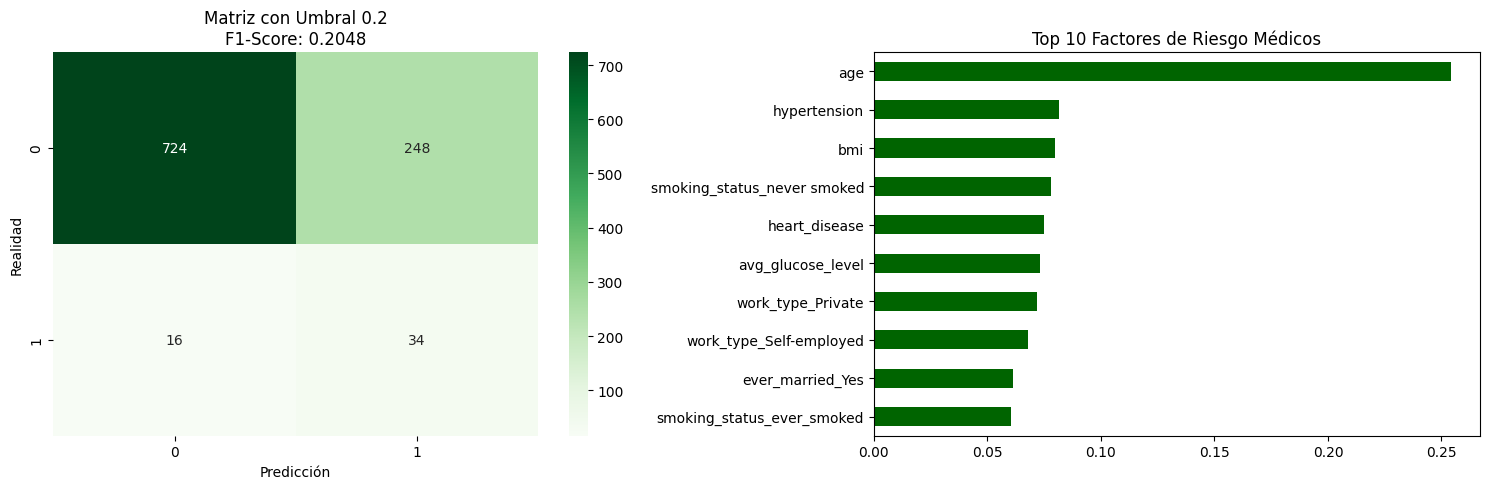


--- REPORTE CLÍNICO (UMBRAL 0.2) ---
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       972
           1       0.12      0.68      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.74      0.81      1022



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# 1. CARGA
df = pd.read_csv('dataset/healthcare-dataset-stroke-final-scaled.csv')
df_final = pd.get_dummies(df, drop_first=True)
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. ENTRENAMIENTO DEL MODELO LÍDER (Configuración Notebooks 1-7)
model_final = XGBClassifier(
    n_estimators=125,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=1.0,
    scale_pos_weight=19.4, # Mantenemos el peso para que el modelo aprenda la importancia
    random_state=42,
    eval_metric='logloss'
)
model_final.fit(X_train, y_train)

# 3. APLICAR UMBRAL PERSONALIZADO (0.2)
# En lugar de usar .predict(), usamos .predict_proba()
y_probs = model_final.predict_proba(X_test)[:, 1]
y_pred_custom = (y_probs >= 0.2).astype(int) # Umbral 0.2

# 4. EVALUACIÓN VISUAL
cm = confusion_matrix(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

plt.figure(figsize=(15, 5))

# Matriz de Confusión
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz con Umbral 0.2\nF1-Score: {f1:.4f}')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Importancia de Variables
plt.subplot(1, 2, 2)
feat_importances = pd.Series(model_final.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgreen')
plt.title('Top 10 Factores de Riesgo Médicos')

plt.tight_layout()
plt.show()

print("\n--- REPORTE CLÍNICO (UMBRAL 0.2) ---")
print(classification_report(y_test, y_pred_custom))